<a href="https://colab.research.google.com/github/Sandeepajmeera/AudioClassification/blob/main/Audio_Classification_Data_Preprocessing_And_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Audio Classification Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-15.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[-0.00086009 -0.00169865 -0.00223887 ...  0.00455982  0.00549624
  0.00732977]


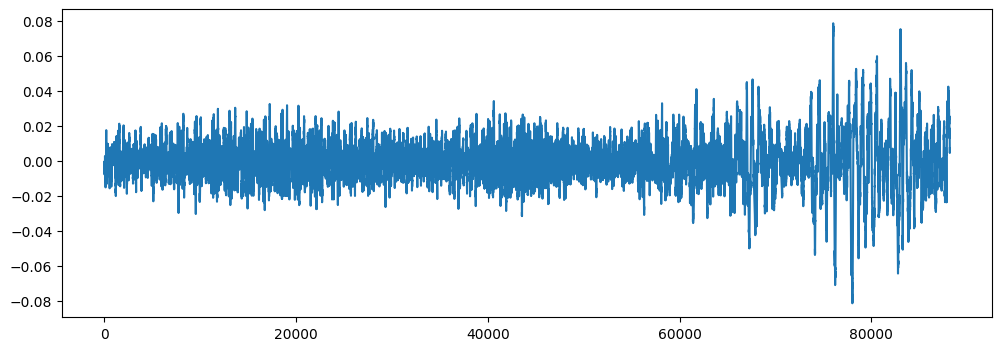

In [4]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [5]:

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [6]:
wave_audio

array([[ -3342336,  -1966080],
       [ -5505024,   -196608],
       [ -7733248,   1048576],
       ...,
       [ 65077248, -36372480],
       [ 66387968, -36831232],
       [ 66191360, -36700160]], dtype=int32)

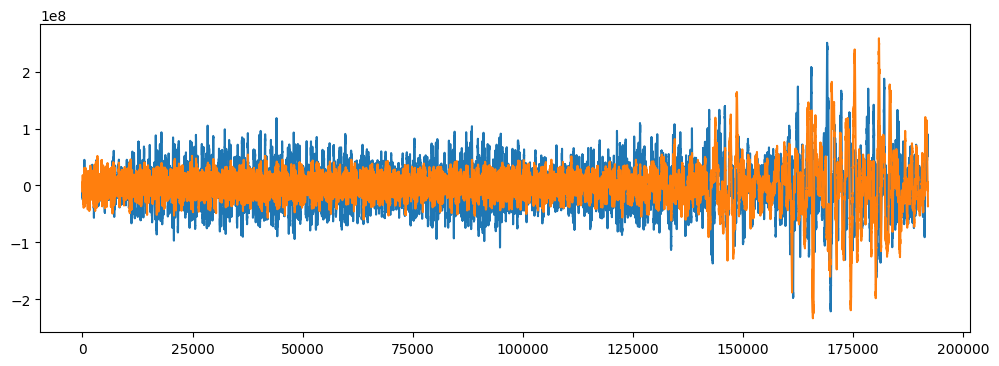

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [9]:
mfccs

array([[-450.12878  , -414.01508  , -412.91428  , ..., -390.51508  ,
        -385.75174  , -395.28564  ],
       [ 131.09233  ,  128.66014  ,  129.56746  , ...,  108.598404 ,
         112.47699  ,  114.31028  ],
       [ -10.769409 ,  -17.083405 ,  -16.658224 , ...,   -6.504595 ,
           3.4051795,   10.077094 ],
       ...,
       [   0.5324455,    1.9285932,    1.2973013, ...,    3.8282049,
           1.4359996,    4.2003503],
       [  -0.4893179,    1.8633016,    1.9895794, ...,    7.1848826,
           3.9997952,    5.0532866],
       [   0.8770757,    2.707551 ,    0.6512257, ...,    3.2339232,
           0.7075385,    1.457504 ]], dtype=float32)

In [10]:

import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/audio/'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features


In [12]:
!pip install resampy

In [13]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
        if os.path.exists(file_name):
        final_class_labels = row["class"]
        data = features_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    else:
        print(f"File not found: {file_name}")


3555it [20:52,  3.08it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [47:52,  3.50it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [47:53,  3.70it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [50:06,  2.90it/s]


In [14]:

extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520653, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [15]:

X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:
X.shape

(8732, 40)

In [17]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [18]:

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746937e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

### Model Creation

In [27]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:

num_labels=y.shape[1]

In [30]:
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [33]:

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 10.9847 - accuracy: 0.1308
Epoch 1: val_loss improved from inf to 2.26880, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 6s 9ms/step - loss: 10.8624 - accuracy: 0.1316 - val_loss: 2.2688 - val_accuracy: 0.1248
Epoch 2/100
  5/219 [..............................] - ETA: 2s - loss: 3.0645 - accuracy: 0.1437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


210/219 [===========================>..] - ETA: 0s - loss: 2.5875 - accuracy: 0.1223
Epoch 2: val_loss did not improve from 2.26880
219/219 [==============================] - 2s 7ms/step - loss: 2.5775 - accuracy: 0.1214 - val_loss: 2.2731 - val_accuracy: 0.1265
Epoch 3/100
216/219 [============================>.] - ETA: 0s - loss: 2.2990 - accuracy: 0.1428
Epoch 3: val_loss improved from 2.26880 to 2.16297, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.2997 - accuracy: 0.1430 - val_loss: 2.1630 - val_accuracy: 0.1935
Epoch 4/100
218/219 [============================>.] - ETA: 0s - loss: 2.2179 - accuracy: 0.1822
Epoch 4: val_loss improved from 2.16297 to 2.10115, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 2.2180 - accuracy: 0.1821 - val_loss: 2.1012 - val_accuracy: 0.2158
Epoch 5/100
217/219 [============================>.] - ETA: 0s - lo

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7595878839492798


### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [43]:
filename="/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-5.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
preds = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(preds, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-130.66876    125.89171    -45.80247     15.817665   -11.370159
    5.4841413   -4.15444     10.934886   -16.430817    13.209432
   -9.106867    -3.6670356   -7.9789815    4.4979267   -5.966979
   13.511171    -1.5250738   13.402847    -2.1584647    5.027983
  -13.320524    -6.1105576   -9.141161     6.065081    -2.1480072
   -7.5811195  -11.39969      8.789799     1.8795937   -8.937918
  -17.052258    -2.331833    11.268741     9.5885935   -1.9843847
   -0.6858406   -5.664263   -14.019611    -2.485525    11.054393 ]
[[-130.66876    125.89171    -45.80247     15.817665   -11.370159
     5.4841413   -4.15444     10.934886   -16.430817    13.209432
    -9.106867    -3.6670356   -7.9789815    4.4979267   -5.966979
    13.511171    -1.5250738   13.402847    -2.1584647    5.027983
   -13.320524    -6.1105576   -9.141161     6.065081    -2.1480072
    -7.5811195  -11.39969      8.789799     1.8795937   -8.937918
   -17.052258    -2.331833    11.268741     9.5885935   -1.9843847
    -0.68584

array(['car_horn'], dtype='<U16')